In [1]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")
    
from src.utils import *
from src.plots import *
import torch.optim as optim

In [2]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
embs = torch.load('../embeddings/audio/raw_hubert.pt')

In [3]:
train_loader, test_loader = train_test_dataloader(embs)

In [4]:
model = MLP(input_dim = 1024, hidden_dims = [1024], output_dim = 6, dropout = 0.3).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
num_epochs = 50

PARAMS = {'model': model,
          'criterion': criterion,
          'optimizer': optimizer,
          'num_epochs': num_epochs,
          'train_loader': train_loader,
          'test_loader': test_loader,
          'device': DEVICE,
          'patience': 10}

/home/mweuro/venvy/best_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
results = train_model(**PARAMS)

Epoch 5/50
Train Loss: 1.3721,                    Train Accuracy: 0.4716,                    Train Precision: 0.4662,                    Train Recall 0.4716.
Val Loss: 1.3381,                    Val Accuracy: 0.4862,                    Val Precision: 0.5137,                    Val Recall: 0.4862.
--------------------------------------------------


Epoch 10/50
Train Loss: 1.1712,                    Train Accuracy: 0.5519,                    Train Precision: 0.5455,                    Train Recall 0.5519.
Val Loss: 1.1471,                    Val Accuracy: 0.5702,                    Val Precision: 0.5708,                    Val Recall: 0.5702.
--------------------------------------------------


Epoch 15/50
Train Loss: 1.0717,                    Train Accuracy: 0.5906,                    Train Precision: 0.5845,                    Train Recall 0.5906.
Val Loss: 1.0959,                    Val Accuracy: 0.5876,                    Val Precision: 0.6068,                    Val Recall: 0.5876.
--------------------------------------------------


Epoch 20/50
Train Loss: 1.0192,                    Train Accuracy: 0.6174,                    Train Precision: 0.6121,                    Train Recall 0.6174.
Val Loss: 1.0310,                    Val Accuracy: 0.6253,                    Val Precision: 0.6315,                    Val Recall: 0.6253.
--------------------------------------------------


Epoch 25/50
Train Loss: 0.9642,                    Train Accuracy: 0.6452,                    Train Precision: 0.6417,                    Train Recall 0.6452.
Val Loss: 0.9618,                    Val Accuracy: 0.6508,                    Val Precision: 0.6483,                    Val Recall: 0.6508.
--------------------------------------------------


Epoch 30/50
Train Loss: 0.9244,                    Train Accuracy: 0.6568,                    Train Precision: 0.6534,                    Train Recall 0.6568.
Val Loss: 0.9300,                    Val Accuracy: 0.6696,                    Val Precision: 0.6710,                    Val Recall: 0.6696.
--------------------------------------------------


Epoch 35/50
Train Loss: 0.8940,                    Train Accuracy: 0.6643,                    Train Precision: 0.6611,                    Train Recall 0.6643.
Val Loss: 0.9116,                    Val Accuracy: 0.6823,                    Val Precision: 0.6832,                    Val Recall: 0.6823.
--------------------------------------------------


Epoch 40/50
Train Loss: 0.8638,                    Train Accuracy: 0.6788,                    Train Precision: 0.6761,                    Train Recall 0.6788.
Val Loss: 0.9186,                    Val Accuracy: 0.6629,                    Val Precision: 0.6673,                    Val Recall: 0.6629.
--------------------------------------------------


Epoch 45/50
Train Loss: 0.8496,                    Train Accuracy: 0.6835,                    Train Precision: 0.6816,                    Train Recall 0.6835.
Val Loss: 0.8727,                    Val Accuracy: 0.6823,                    Val Precision: 0.6822,                    Val Recall: 0.6823.
--------------------------------------------------


Epoch 50/50
Train Loss: 0.8156,                    Train Accuracy: 0.6991,                    Train Precision: 0.6970,                    Train Recall 0.6991.
Val Loss: 0.8741,                    Val Accuracy: 0.6870,                    Val Precision: 0.6977,                    Val Recall: 0.6870.
--------------------------------------------------
BEST EPOCH: 43.00          BEST ACCURACY: 0.70          BEST PRECISION: 0.69          BEST RECALL: 0.70


In [6]:
epochs, train_losses, val_losses, train_accs, val_accs, train_precs, val_precs, train_recs, val_recs, best_epoch, cm = results

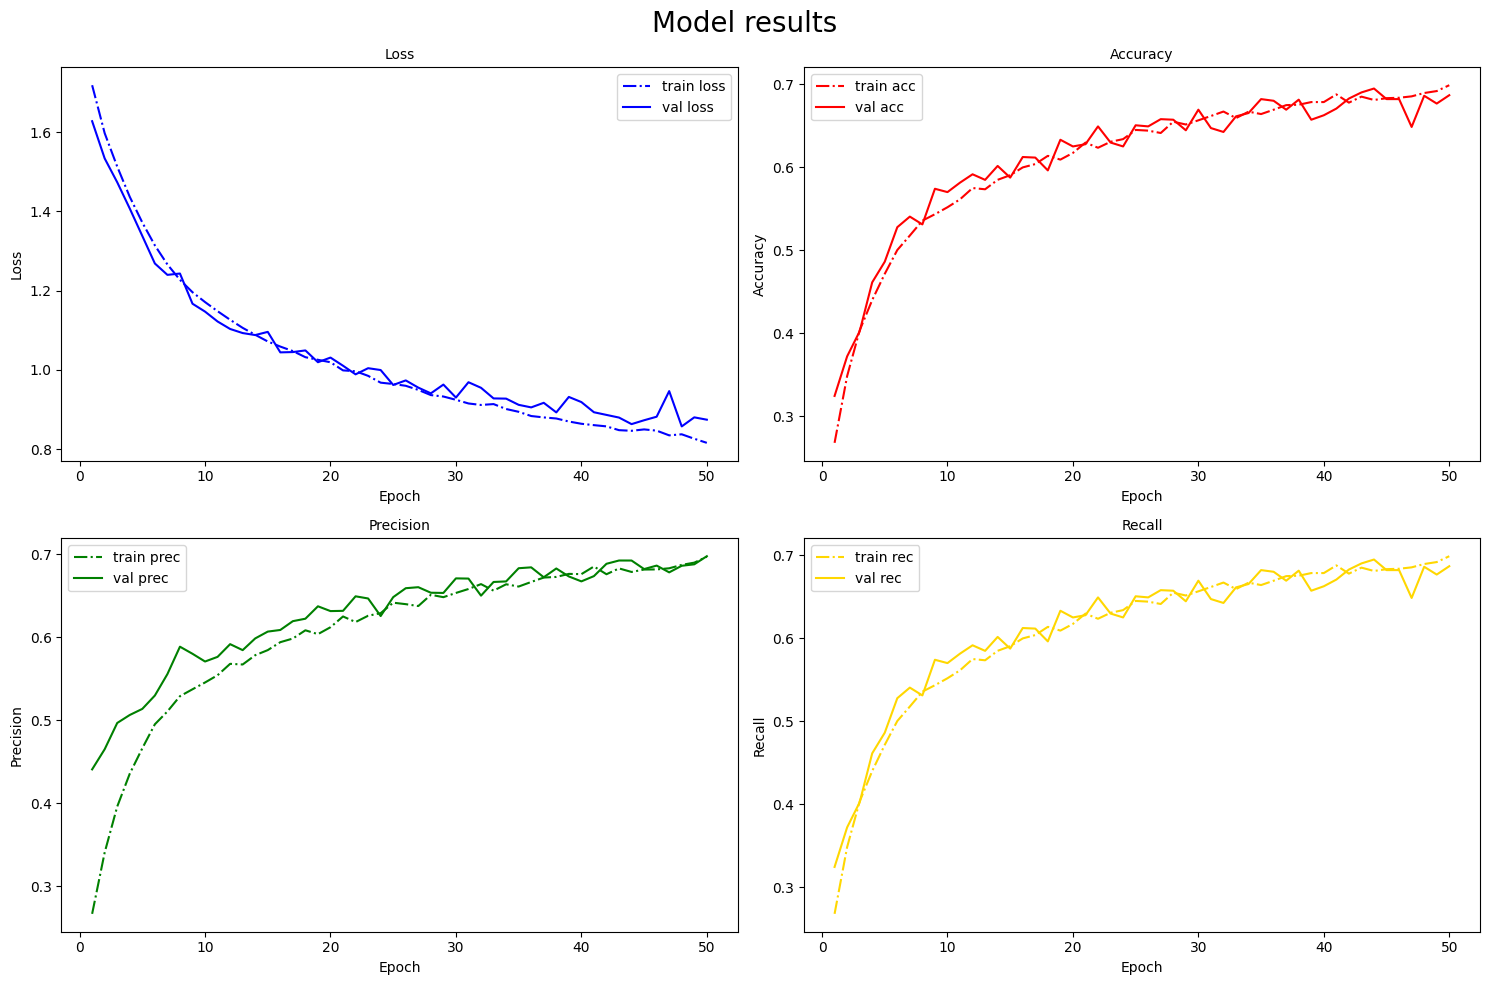

In [7]:
plot_metrics(train_losses, val_losses, train_accs, val_accs, train_precs, val_precs, train_recs, val_recs)

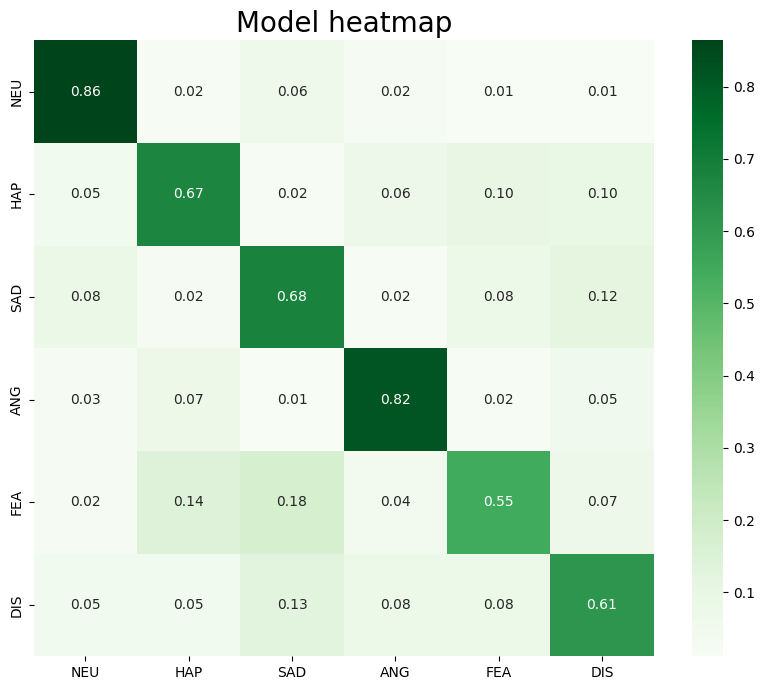

In [8]:
plot_confusion_matrix(cm)